# Goals 
- **1. We have to reach above 85% to reach top 300**
- **2. We have to make our model less overit**
- **3. We need above 90% on the training data**

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [72]:
df = train_df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df = df.drop(['PassengerId', 'Ticket'], axis=1)
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,NaN,Q


# Problem 

**1.**  Our BIGGEST problem is that our model is overfitting we are getting 86% on Trainign data but highest we have gotten is 79.425% on Testing data. This clearly shows that our model is overfitting.

- Let's see what just accuracy just the vanilla dataset gives us (no feature engineering)

In [74]:
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.ensemble import RandomForestClassifier

# # Define the feature columns
# numerical_features = ['Age', 'Fare', 'Parch', 'SibSp']
# categorical_features = ['Pclass', 'Sex', 'Embarked']

# # Separate the target variable
# X_train = train_df[numerical_features + categorical_features]
# y_train = train_df['Survived']

# # Define the numerical pipeline
# numerical_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# # Define the categorical pipeline
# categorical_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine the numerical and categorical pipelines
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_pipeline, numerical_features),
#         ('cat', categorical_pipeline, categorical_features)
#     ])

# # Create the full pipeline with a classifier at the end
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
# ])

# # Fit the pipeline to the training data
# pipeline.fit(X_train, y_train)


# # Make sure the test data has the same features as the training data
# X_test = test_df[numerical_features + categorical_features]

# # Make predictions
# test_predictions = pipeline.predict(X_test)

# # Prepare the submission DataFrame
# submission = pd.DataFrame({
#     'PassengerId': test_df['PassengerId'],
#     'Survived': test_predictions
# })



- we are getting 76.076 just by just using 5 Features let's add `Parch` `SibSp` as well
- after adding those two features we are getting 78.7 now, this shows that

- we should use all these columns and add some magic of feature engineering to find some new features as well. It will help us reach higher accuracy 

# Data Discovery 

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [76]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [77]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- we know we have some missing rows in `Age` and `Cabin`
- Let's check the distribution of the columns and using boxplot

# EDA & Feature Engineering

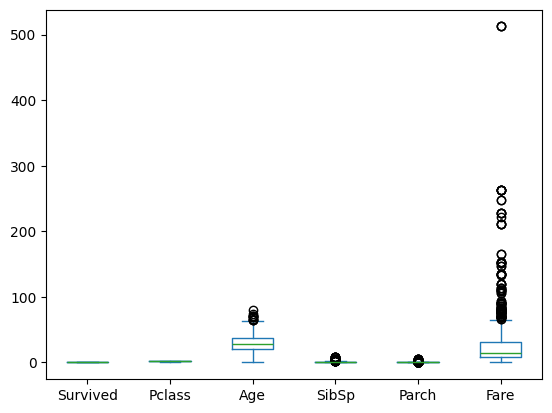

In [78]:
df.plot(kind='box')
plt.show()

In [79]:
df[df.Fare > 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C


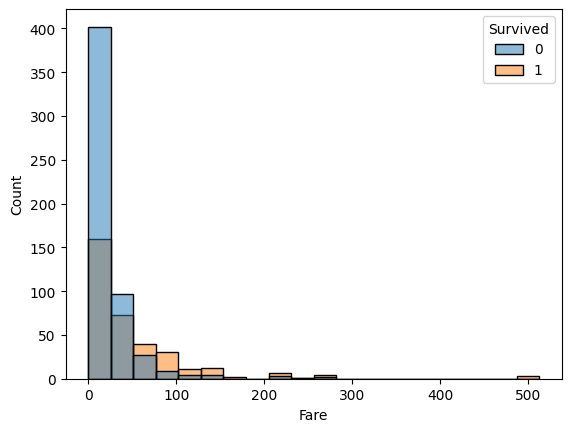

In [80]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=20)
plt.show()

- looks like Higher `Fare` has more survival chances so let's create **Classes** for `Fare` feature
- The classes will be - 
  1. Low
  2. Medium
  3. High
  4. Very High

In [83]:
df['FareGroup'] = pd.cut(df['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])
df[df.Fare > 250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FareGroup
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,C23 C25 C27,S,Luxury
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,263.0000,C23 C25 C27,S,Luxury
258,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,Luxury
311,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,262.3750,B57 B59 B63 B66,C,Luxury
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,263.0000,C23 C25 C27,S,Luxury
438,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,C23 C25 C27,S,Luxury
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,Luxury
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C,Luxury
742,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,262.3750,B57 B59 B63 B66,C,Luxury


- Great we have create a new feature `Fare_Cat`.

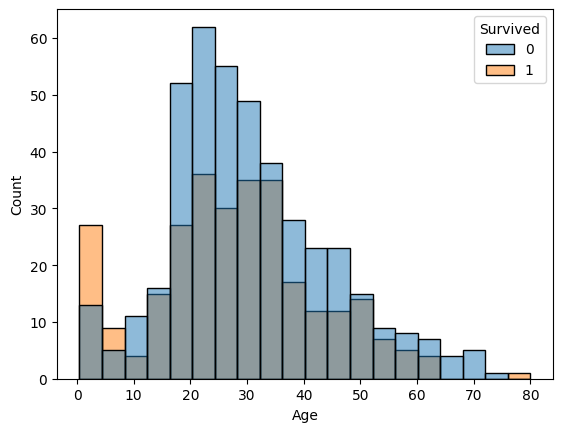

In [85]:
sns.histplot(data=df, x='Age', hue='Survived')
plt.show()

- here is an interesting pattern, we can see that 'childrens' have very high survival rate(age < 10)
- we can do something similar with this feature as well i.e., we can categorize the `Age` feature as well.

In [86]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
survival_percentage = df.groupby('AgeGroup')['Survived'].mean().round(4) * 100
survival_percentage_dict = dict(survival_percentage)

/tmp/ipykernel_27545/1434171226.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_percentage = df.groupby('AgeGroup')['Survived'].mean().round(4) * 100


In [87]:
df['AgeGroupSurvival'] = df['AgeGroup'].map(survival_percentage_dict)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FareGroup,FamilySize,AgeGroup,AgeGroupSurvival
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Low,1,20-30,35.00
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,High,1,30-40,43.71
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Low,0,20-30,35.00
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,High,1,30-40,43.71
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Low,0,30-40,43.71


In [89]:
fare_group_survival = df.groupby('FareGroup').Survived.mean().round(4) * 100
fare_group_survival_dict = dict(fare_group_survival)

/tmp/ipykernel_27545/1282453630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_survival = df.groupby('FareGroup').Survived.mean().round(4) * 100


In [90]:
df['FareGroupSurvival'] = df['FareGroup'].map(fare_group_survival_dict)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FareGroup,FamilySize,AgeGroup,AgeGroupSurvival,FareGroupSurvival
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Low,1,20-30,35.00,25.62
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,High,1,30-40,43.71,65.42
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Low,0,20-30,35.00,25.62
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,High,1,30-40,43.71,65.42
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Low,0,30-40,43.71,25.62


In [91]:
df = df.drop(['Name', 'Cabin'], axis=1)
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareGroup,FamilySize,AgeGroup,AgeGroupSurvival,FareGroupSurvival
886,0,2,male,27.0,0,0,13.00,S,Low,0,20-30,35.00,25.62
887,1,1,female,19.0,0,0,30.00,S,Medium,0,10-20,40.20,41.95
888,0,3,female,NaN,1,2,23.45,S,Moderate,3,NaN,NaN,46.46
889,1,1,male,26.0,0,0,30.00,C,Medium,0,20-30,35.00,41.95
890,0,3,male,32.0,0,0,7.75,Q,Low,0,30-40,43.71,25.62


# Test data preparation

In [96]:
df2 = test_df
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
df2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [98]:
df2 = df2.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df2.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [107]:
df2['FareGroup'] = pd.cut(df2['Fare'], bins= [0, 5, 15, 25, 50, 100, 250, float('inf')],
                         labels=['Very Low', 'Low', 'Moderate', 'Medium', 'High', 'Very High', 'Luxury'])

#Age group 
df2['AgeGroup'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)

# Age group survival
df2['AgeGroupSurvival'] = df2['AgeGroup'].map(survival_percentage_dict)

#Fare group survival 
df2['FareGroupSurvival'] = df2['FareGroup'].map(fare_group_survival_dict)
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareGroup,FamilySize,AgeGroup,AgeGroupSurvival,FareGroupSurvival
0,3,male,34.5,0,0,7.8292,Q,Low,0,30-40,43.71,25.62
1,3,female,47.0,1,0,7.0000,S,Low,1,40-50,38.20,25.62
2,2,male,62.0,0,0,9.6875,Q,Low,0,60-70,31.58,25.62
3,3,male,27.0,0,0,8.6625,S,Low,0,20-30,35.00,25.62
4,3,female,22.0,1,1,12.2875,S,Low,2,20-30,35.00,25.62


In [128]:
df2.isnull().sum()

Pclass                0
Sex                   0
Age                  86
SibSp                 0
Parch                 0
Fare                  1
Embarked              0
FareGroup             3
FamilySize            0
AgeGroup             86
AgeGroupSurvival     86
FareGroupSurvival     3
dtype: int64

In [132]:
df2[df2.FareGroupSurvival.isnull() ==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FareGroup,FamilySize,AgeGroup,AgeGroupSurvival,FareGroupSurvival
152,3,male,60.5,0,0,NaN,S,NaN,0,60-70,31.58,NaN
266,1,male,NaN,0,0,0.0,S,NaN,0,NaN,NaN,NaN
372,1,male,49.0,0,0,0.0,S,NaN,0,40-50,38.20,NaN


# Pipeline

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [111]:
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'AgeGroupSurvival']
categorical_features = ['Sex', 'Embarked','AgeGroup','FareGroup']
target = 'Survived'

In [112]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [113]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the numerical and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])


# Classifier

In [114]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [143]:
class MyClassifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X, y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X, y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)